## Exploratory Data Analysis

Project Overview

In this project, you will apply your data science and machine learning skills to develop a predictive model for Easy Visa Dataset. This project will involve data cleaning, exploratory data analysis (EDA), data preprocessing, model training,hyperparameter tuning and evaluation. 

Project Introduction

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.



Project Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.


The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:


Facilitate the process of visa approvals.

Recommend a suitable profile for the applicants for whom the visa should be 

certified or denied based on the drivers that significantly influence the case 

Status.

# Import Necessary Libraries

In [1]:

import warnings

warnings.filterwarnings("ignore")

# help with reading and manipulating data
import numpy as np
import pandas as pd

# to split data
from sklearn.model_selection import train_test_split

# help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\Backend\BACKEND-AI\MACHINE_LEARNING\EASY_VISA\Visa_data.csv')

In [3]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Exploratory Data Analysis

In [4]:



# Check the count of each unique category in categorical variables
# Making a list of all catrgorical variables

cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

    

case_id
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
EZYV05       1
            ..
EZYV25476    1
EZYV25477    1
EZYV25478    1
EZYV25479    1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [5]:
data.describe() 

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# Univariate Analysis

In [6]:
def univ_analysis(data, feature, figsize = (15, 10), kde=False, bins = None):
    """
    Boxplot and histogram is combined in this plot

    data: dataframe, feature: Column in dataframe, figsize= (15, 10), kde: To show density curve(False), bins: (default: None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on Age Feature

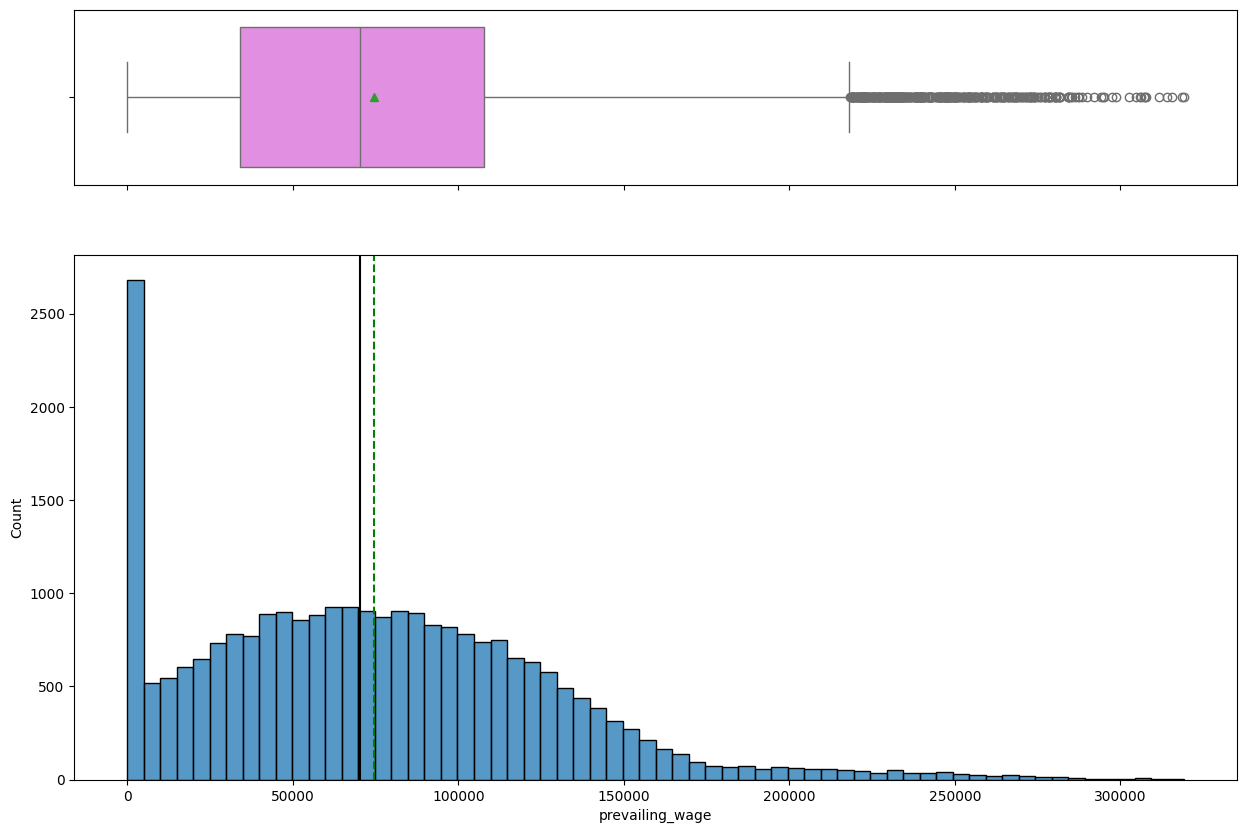

In [7]:
univ_analysis(data, "prevailing_wage")

### Findings from Prevailing wage Analysis
#### Observation
1. There is prescence of outliers from the boxplots
2. The histogram is highly rightly skewed, which indicates the prescence of positive outliers.
3. The concentration of the data is between 0 and 150000

#### Action.
Apply Log Transform to reduce skewness, and make the distribution more symmetrical, which might improve the models performance.
Also we can handle the outliers by applying the Robust scaler. 


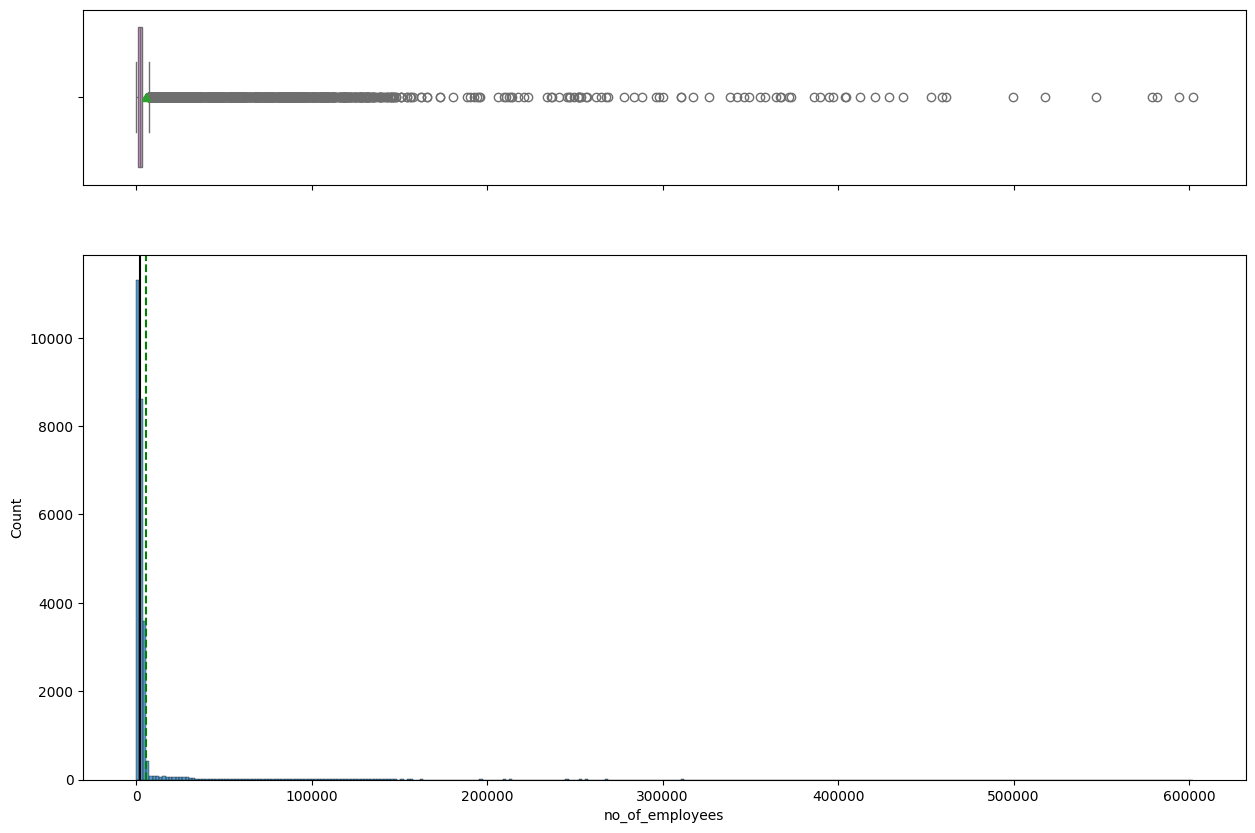

In [8]:
univ_analysis(data, "no_of_employees")

### Findings from no of employees

#### Observations
1. The tail is to the right, indicating it is positively skewed.
2. Companies have between 0 to 100 employees
3. From the boxplot it is evident that there are positive outliers






# Categorical Features

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Object Columns
obj_columns = [x for x in data.columns if data[x].dtype == object]
for i in obj_columns:
    labeled_barplot(data, i)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000021E213D7100> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 